# Automatyzacja Excela

# Pierwsze kroki z xlwings

## Excel jako przeglądarka danych

In [1]:
# Najpierw importujemy pakiety, których będziemy używać w tym rozdziale
import datetime as dt
import xlwings as xw
import pandas as pd
import numpy as np

In [10]:
# Tworzymy DataFrame na podstawie liczb pseudolosowych, z taką
# liczbą wierszy, że widoczne będą tylko początkowe i końcowe
df = pd.DataFrame(data=np.random.randn(100, 5),
                  columns=[f"Próba {i}" for i in range(1, 6)])
df

,Próba 1,Próba 2,Próba 3,Próba 4,Próba 5
0,-0.688616,0.032748,0.891236,-0.544217,0.378108
1,1.100100,-0.508320,0.390952,0.363083,-1.061099
2,0.244024,0.333766,0.802253,0.184679,0.628909
3,-0.681603,0.829175,-2.420353,-0.301932,-1.212479
4,0.438430,0.279795,0.160456,-0.366814,-0.390384
...,...,...,...,...,...
95,-0.282497,-0.565755,0.519534,0.075834,0.038333
96,-0.126254,0.162723,-1.243883,-1.102140,1.170508
97,-0.635457,-0.883338,-0.332642,-1.460255,-0.307262
98,-0.617771,0.291205,0.033260,0.275054,0.583403


## Model obiektowy Excela

In [ ]:
book = xw.Book()
sheet1 = book.sheets[0]
sheet1 = book.sheets["Sheet1"]

In [21]:
# Utworzenie nowego pustego skoroszytu i wypisanie jego nazwy.
book = xw.Book()
book.name

'Book1'

In [22]:
# Uzyskanie dostępu do kolekcji arkuszy
book.sheets

Sheets([<Sheet [Book1]Sheet1>])

In [23]:
# Uzyskanie obiektu arkusza poprzez indeks lub nazwę. Jeśli
# Twój arkusz ma inną nazwę, wpisz ją zamiast "Sheet1".
sheet1 = book.sheets[0]
sheet1 = book.sheets["Sheet1"]

In [24]:
sheet1.range("A1")

<Range [Book1]Sheet1!$A$1>

In [42]:
# Najczęstsze zadania: zapisywanie wartości ...
sheet1.range("A1").value = [[1, 2],
                            [3, 4]]
sheet1.range("A4").value = "Witaj!"

In [26]:
# ... i odczytywanie wartości
sheet1.range("A1:B2").value

[[1.0, 2.0], [3.0, 4.0]]

In [27]:
sheet1.range("A4").value

'Witaj!'

In [28]:
# Indeksowanie
sheet1.range("A1:B2")[0, 0]

<Range [Book1]Sheet1!$A$1>

In [34]:
# Wycinanie
sheet1.range("A1:B2")[:, 1]

<Range [Book1]Sheet1!$B$1:$B$2>

In [32]:
# Pojedyncza komórka: notacja A1
sheet1["A1"]

<Range [Book1]Sheet1!$A$1>

In [35]:
# Wiele komórek: notacja A1
sheet1["A1:B2"]

<Range [Book1]Sheet1!$A$1:$B$2>

In [36]:
# Pojedyncza komórka: indeksowanie
sheet1[0, 0]

<Range [Book1]Sheet1!$A$1>

In [37]:
# Wiele komórek: wycinanie
sheet1[:2, :2]

<Range [Book1]Sheet1!$A$1:$B$2>

In [38]:
book.sheets[0].range("A1:B2").value

[[1.0, 2.0], [3.0, 4.0]]

In [ ]:
# D10 poprzez indeksowanie arkusza
sheet1[9, 3]

In [46]:
# D10 poprzez obiekt range
sheet1.range((10, 4))

<Range [Book1]Sheet1!$D$10>

In [47]:
# D10:F11 poprzez wycinanie arkusza
sheet1[9:11, 3:6]

<Range [Book1]Sheet1!$D$10:$F$11>

In [48]:
# D10:F11 poprzez obiekt range
sheet1.range((10, 4), (11, 6))

<Range [Book1]Sheet1!$D$10:$F$11>

### Instancje

In [50]:
# Pobranie jednego obiektu app z otwartego skoroszytu
# i utworzenie dodatkowej niewidocznej instancji app
visible_app = sheet1.book.app
invisible_app = xw.App(visible=False)

In [51]:
# Wypisanie nazw skoroszytów, które są otwarte w każdej instancji,
# poprzez wykorzystanie listy składanej
[book.name for book in visible_app.books]

['Book1']

In [52]:
[book.name for book in invisible_app.books]

['Book2']

In [49]:
sheet1["A1"].sheet.book.app

<App [excel] 5284>

In [53]:
# Klucz aplikacji, reprezentujący identyfikator procesu (PID)
xw.apps.keys()

[14232, 5284]

In [54]:
# Można uzyskać do niego dostęp również poprzez atrybut pid
xw.apps.active.pid

14232

In [57]:
# Praca ze skoroszytem w niewidocznej instancji Excela
invisible_book = invisible_app.books[0]
invisible_book.sheets[0]["A1"].value = "Utworzone przez niewidoczną aplikację."

In [58]:
# Zapisanie skoroszytu Excela w katalogu xl
invisible_book.save("xl/invisible.xlsx")

In [59]:
# Zamknięcie niewidocznej instancji Excela
invisible_app.quit()

In [ ]:
mój_app = x

In [ ]:
mój_app.books.add()

mój_app.books.open("Zeszyt.xlsx")

mój_app.books.open(r"C:\ścieżka\Zeszyt.xlsx")

## Uruchamianie kodu VBA

In [3]:
vba_book = xw.Book("xl/vba.xlsm")

In [6]:
sheet_vba = vba_book.sheets[0]

In [4]:
# Utworzenie instancji obiektu macro z funkcją VBA
mysum = vba_book.macro("Module1.MySum")
# Wywołanie funkcji VBA
mysum(5, 4)

9.0

In [8]:
sheet_vba["A1"].value = mysum(2,100)

In [9]:
# Tak samo działa to z procedurą Sub VBA
show_msgbox = vba_book.macro("Module1.ShowMsgBox")
show_msgbox("Witaj, xlwings!")

In [10]:
# Zamknięcie skoroszytu (upewnij się, że najpierw zamknąłeś okno MessageBox)
vba_book.close()

# Konwertery, opcje i kolekcje

## Praca z obiektami DataFrame

In [11]:
data=[["Mark", 55, "Włochy", 4.5, "Europa"],
      ["John", 33, "USA", 6.7, "Ameryka"]]
df = pd.DataFrame(data=data,
                  columns=["imię", "wiek", "kraj",
                           "ocena", "kontynent"],
                  index=[1001, 1000])
df.index.name = "numer"
df

,imię,wiek,kraj,ocena,kontynent
numer,,,,,
1001,Mark,55,Włochy,4.5,Europa
1000,John,33,USA,6.7,Ameryka


In [13]:
book = xw.Book()
sheet1 = book.sheets[0]
sheet1 = book.sheets["Sheet1"]

In [14]:
sheet1["A6"].value = df

In [15]:
sheet1["B10"].options(header=False, index=False).value = df

In [17]:
df2 = sheet1["A6"].expand().options(pd.DataFrame).value
df2

,imię,wiek,kraj,ocena,kontynent
numer,,,,,
2222.0,Arnold,30.0,Polska,10.0,Europa
3333.0,Michael,40.0,USA,5.0,Ameryka


In [18]:
# Jeśli chcesz, aby indeks zawierał liczby całkowite,
# możesz zmienić jego typ danych
df2.index = df2.index.astype(int)
df2

,imię,wiek,kraj,ocena,kontynent
numer,,,,,
2222,Arnold,30.0,Polska,10.0,Europa
3333,Michael,40.0,USA,5.0,Ameryka


In [19]:
# Ustawienie index=False spowoduje, że wszystkie wartości z Excela zostaną
# umieszczone w części danych DataFrame i zostanie użyty domyślny indeks
sheet1["A6"].expand().options(pd.DataFrame, index=False).value

,numer,imię,wiek,kraj,ocena,kontynent
0,1001.0,Mark,55.0,Włochy,4.5,Europa
1,1000.0,John,33.0,USA,6.7,Ameryka


## Konwertery i opcje

In [21]:
# Zakres poziomy (jednowymiarowy)
sheet1["A1:B1"].value

['a', 'b']

In [22]:
# Zakres pionowy (jednowymiarowy)
sheet1["A1:A2"].value

['a', 'c']

In [23]:
# Zakres poziomy (dwuwymiarowy)
sheet1["A1:B1"].options(ndim=2).value

[['a', 'b']]

In [24]:
# Zakres pionowy (dwuwymiarowy)
sheet1["A1:A2"].options(ndim=2).value

[['a'], ['c']]

In [25]:
# Taki sam efekt da użycie konwertera do tablic NumPy:
# pionowy zakres prowadzi do tablicy jednowymiarowej
sheet1["A1:A2"].options(np.array).value

array(['a', 'c'], dtype='<U1')

In [26]:
# Zachowanie orientacji kolumn
sheet1["A1:A2"].options(np.array, ndim=2).value

array([['a'],
       ['c']], dtype='<U1')

In [28]:
# Jeśli musisz wypisać listę w pionie,
# przydatna będzie opcja "transpose".
sheet1["D1"].options(transpose=True).value = [100, 200]

In [29]:
# Wypisz jakieś przykładowe dane
sheet1["A13"].value = [dt.datetime(2020, 1, 1), None, 1.0]

In [30]:
# Wczytaj je z powrotem, używając domyślnych opcji
sheet1["A13:C13"].value

[datetime.datetime(2020, 1, 1, 0, 0), None, 1.0]

In [31]:
# Wczytaj je ponownie, używając opcji innych niż domyślne
sheet1["A13:C13"].options(empty="nd.",
                          dates=dt.date,
                          numbers=int).value

[datetime.date(2020, 1, 1), 'nd.', 1]

## Wykresy, obrazy i zdefiniowane nazwy

In [35]:
sheet1["A15"].value = [[None, "Północ", "Południe"],
                       ["Ubiegły rok", 2, 5],
                       ["Bieżący rok", 3, 6]]

In [36]:
chart = sheet1.charts.add(top=sheet1["A19"].top,
                          left=sheet1["A19"].left)
chart.chart_type = "column_clustered"
chart.set_source_data(sheet1["A15"].expand())

In [37]:
# Wczytanie danych wykresu jako DataFrame
df = sheet1["A15"].expand().options(pd.DataFrame).value
df

,Północ,Południe
Ubiegły rok,2.0,5.0
Bieżący rok,3.0,6.0


In [38]:
# Włączenie Matplotlib przy użyciu magicznego polecenia
# i przełączenie na styl "seaborn"
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\krzys\AppData\Local\Temp\ipykernel_11280\2969196276.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


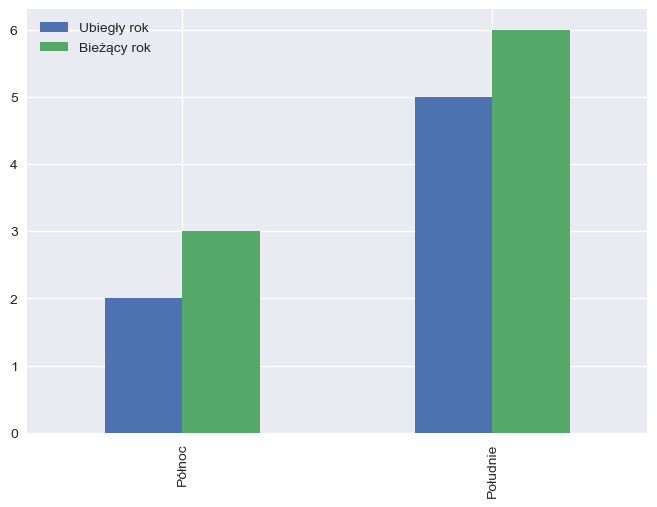

In [39]:
# Metoda plot biblioteki pandas zwraca obiekt "axis", z którego
# można uzyskać obiekt figure. "T" wykonuje transpozycję DataFrame,
# aby ustawić wykres w żądanej orientacji
ax = df.T.plot.bar()
fig = ax.get_figure()

In [40]:
# Wysłanie wykresu do Excela.
plot = sheet1.pictures.add(fig, name="SalesPlot",
                           top=sheet1["H19"].top,
                           left=sheet1["H19"].left)
# Przeskalowanie wykresu do 70%
plot.width, plot.height = plot.width * 0.7, plot.height * 0.7

In [41]:
ax = (df + 1).T.plot.bar()
plot = plot.update(ax.get_figure())

In [42]:
# Zakresem domyślnym jest zakres skoroszytu
sheet1["A1:B2"].name = "macierz1"

In [44]:
# W przypadku zakresu arkusza po nazwie arkusza
# należy wstawić wykrzyknik
sheet1["B10:E11"].name = "Sheet1!macierz2"

In [45]:
# Teraz możesz uzyskać dostęp do zakresu poprzez nazwę
sheet1["macierz1"]

<Range [Book1]Sheet1!$A$1:$B$2>

In [46]:
# Jeśli dostęp do kolekcji nazw odbywa się poprzez obiekt "sheet1",
# zawiera ona tylko nazwy w obrębie tego arkusza
sheet1.names

[<Name 'Sheet1!macierz2': =Sheet1!$B$10:$E$11>]

In [47]:
# Jeśli dostęp do kolekcji nazw odbywa się poprzez obiekt "book",
# zawiera ona wszystkie nazwy, zarówno w obrębie skoroszytu, jak i arkusza
book.names

[<Name 'macierz1': =Sheet1!$A$1:$B$2>, <Name 'Sheet1!macierz2': =Sheet1!$B$10:$E$11>]

In [48]:
# Nazwy mają różne metody i atrybuty.
# Dzięki temu możesz np. uzyskać odpowiedni obiekt zakresu.
book.names["macierz1"].refers_to_range

<Range [Book1]Sheet1!$A$1:$B$2>

In [50]:
# Jeśli chcesz przypisać nazwę do stałej
# lub formuły, użyj metody "add"
book.names.add("EURUSD", "1,1151")

<Name 'EURUSD': =11151>

# Zagadnienia zaawansowane

In [53]:
book = xw.Book()
sheet1 = book.sheets[0]
sheet1 = book.sheets["Sheet1"]

## Wydajność

In [59]:
# Dodanie nowego arkusza i wpisanie do niego
# 150 wartości, by mieć z czym pracować
sheet2 = book.sheets.add()
sheet2["A1"].value = np.arange(150).reshape(30, 5)

In [60]:
%%time
# W ten sposób powstaje 150 wywołań międzyaplikacyjnych
for cell in sheet2["A1:E30"]:
    cell.value += 1

CPU times: total: 797 ms
Wall time: 2.35 s


In [61]:
%%time
# W ten sposób powstają tylko dwa wywołania międzyaplikacyjne
values = sheet2["A1:E30"].options(np.array).value
sheet2["A1"].value = values + 1

CPU times: total: 31.2 ms
Wall time: 102 ms


In [62]:
# W przypadku surowych wartości musisz podać pełny
# zakres docelowy, sheet["A35"] już nie zadziała
sheet1["A35:B36"].options("raw").value = [[1, 2], [3, 4]]